# Decision Tree Workshop

## Iris Data Set 분류 문제를 Decision Dtree로 풀어 봅니다.

### Q. iris data를 로드 하세요.

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### Q. iris 데이타를  pd.DataFrame으로 표시하세요.

In [7]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['class_name'] = iris.target_names[iris.target]

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Q. seaborn의 pairplot을 그려보세요.

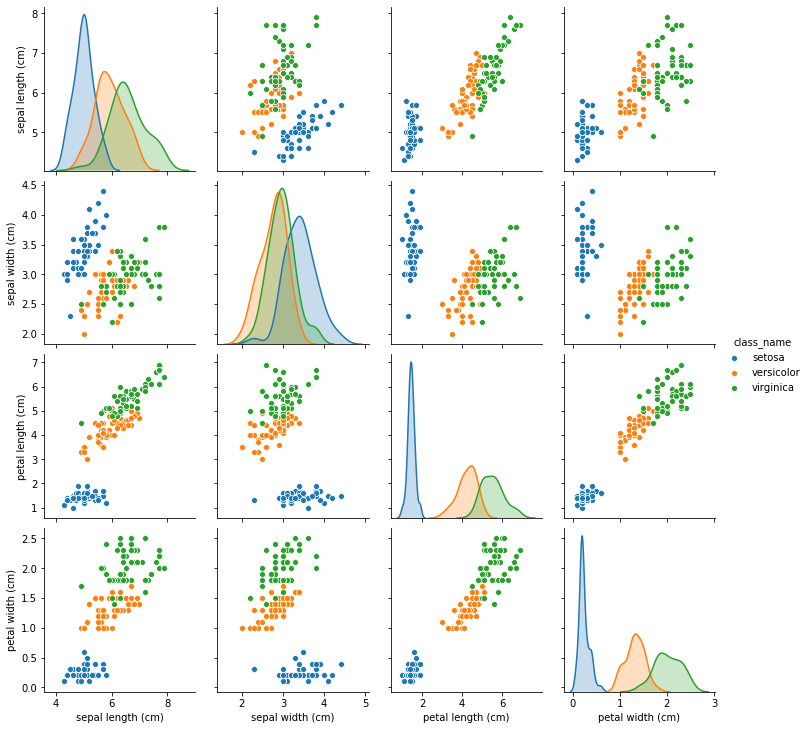

In [9]:
import seaborn as sns
sns.pairplot(iris_df, hue="class_name")

#### Q. train, test dataset을 나누세요.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
print(X_train.shape, X_test.shape)


(112, 4) (38, 4)


#### Q. Decision Tree, entopy 지수로 훈련 및 평가 해 보세요.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


cls = DecisionTreeClassifier(criterion='entropy')
cls.fit(X_train, y_train)
print("Train Score:", cls.score(X_train, y_train), "test score:", cls.score(X_test, y_test))
print("depth", cls.get_depth())

Train Score: 1.0 test score: 0.9736842105263158
depth 4


#### Q. GridServerCV로 최적의 파라미터를 찾아 보세요.
```
param = {'criterion': ['entropy', 'gini'], 'max_depth': range(1, 5)}```

In [15]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

param = {'criterion': ['entropy', 'gini'], 'max_depth': range(1, 5)}
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param)
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)
print("best param:", grid.best_params_)
best = grid.best_estimator_

print("Train Score:", best.score(X_train, y_train), "test score:", best.score(X_test, y_test))
print("depth", best.get_depth())

best param: {'criterion': 'entropy', 'max_depth': 2}
Train Score: 0.9642857142857143 test score: 0.9473684210526315
depth 2
